# Table of Contents

1. <a href="#1.-Data-Understanding,-Preparation-&-EDA">Data Understanding, Preparation & EDA</a>
  1. <a href="#1.1.-Data-Quality-Checks">Data Quality Checks</a>
    1. <a href="#1.1.1.-Data-Types">Data Types</a>
    2. <a href="#1.1.2.-Null/NA-Values">Null/NA Values</a>
    3. <a href="#1.1.3.-Data-Duplications">Data Duplications</a>
    4. <a href="#1.1.4.-Irrelevant-Columns">Irrelevant Columns</a>
    5. <a href="#1.1.5.-Shape-of-Distribution">Shape of Distribution</a>
  2. <a href="#1.2.-Categorical-Variables">Categorical Variables</a>
    1. <a href="#1.2.1.-Fix-Season-Data">Fix Season Data</a>
    2. <a href="#1.2.2.-Fix-Weather-Data">Fix Weather Data</a>
  3. <a href="#1.3.-Dummy-Variables">Dummy Variables</a>
    1. <a href="#1.3.1.-Season-Dummy-Variables">Season Dummy Variables</a>
    2. <a href="#1.3.2.-Weather-Dummy-Variables">Weather Dummy Variables</a>
  4. <a href="#1.4.-Derived-Metrics">Derived Metrics</a>
    1. <a href="#1.4.1.-Ratios">Ratios</a>
    2. <a href="#1.4.2.-Weathers">Weathers</a>
    3. <a href="#1.4.3.-Dates">Dates</a>
  5. <a href="#1.5.-Data-Cleaning">Data Cleaning</a>
    1. <a href="#1.5.1.-Remove-Columns">Remove Columns</a>
2. <a href="#2.-Model-Building-and-Evaluation">Model Building and Evaluation</a>
  1. <a href="#2.1.-Parameter-Tuning">Parameter Tuning</a>
    1. <a href="#2.1.1.-Simple-Linear-Regression">Simple Linear Regression</a>
    2. <a href="#2.1.2.-Multiple-Linear-Regression">Multiple Linear Regression</a>
  2. <a href="#2.2.-Variable-Selection">Variable Selection</a>
    1. <a href="#2.2.1.-Multiple-Linear-Regression-with-VIF">Multiple Linear Regression with VIF</a>
    2. <a href="#2.2.2.-Multiple-Linear-Regression-with-RFE">Multiple Linear Regression with RFE</a>
  3. <a href="#2.3.-Model-Selection">Model Selection</a>
    1. <a href="#2.3.1.-Potential-Models">Potential Models</a>
    2. <a href="#2.3.2.-Best-Possible-Model">Best Possible Model</a>
  4. <a href="#2.4.-Model-Evaluation">Model Evaluation</a>
    1. <a href="#2.4.1.-Residual-Analysis">Residual Analysis</a>
    2. <a href="#2.4.2.-Model-Prediction">Model Prediction</a>
    3. <a href="#2.4.3.-Model-Interpretation">Model Interpretation</a>

# 1. Data Understanding, Preparation & EDA

The following statements installs packages that doesn't exists in default installation of jupyter notebooks.

In [1]:
%%capture

import sys

!{sys.executable} -m pip install metpy

The following statements will import the required libraries:
- `matplotlib.pyplot`, used to display the plot.
- `metpy`, used to calculate weather data, e.g. apparent temperature, heat index and windchill.
- `numpy`, used to perform high performance mathematical calculation.
- `pandas`, used to read the csv and perform analysis on it.
- `seaborn`, used to create plots and charts.
- `sklearn`, used to create machine learning model.
- `statsmodels`, used to calculate variance inflation factor.

In [2]:
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import pandas as pd
import seaborn as sns

from metpy.units import units
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

Lets read our data with the data type inferred automatically by pandas.

In [3]:
df = pd.read_csv('dataset/day.csv')

## 1.1. Data Quality Checks

### 1.1.1. Data Types

Lets take a look at our data and data types if they represented accordingly.

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### Categorical Columns

There are columns that has varying data, even though the values are of integers, but they provide no particular order when reading from the data description, and therefore we must treat them as categorical columns.

1. season : season (1:spring, 2:summer, 3:fall, 4:winter)
2. weathersit : 
  1. 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  2. 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Even if we know the fact that the season are in particular order in a year, given that in a year, the first season is spring, then comes summer, later on comes fall, finally comes winter, but as for the data, it makes no sense to order the data based on the season as they don't provide some sort of ranking.

On the other hand, the weather feels like clear is better than mist, which is better than light show,  which is better than heavy rain, but again, it makes no sense ordering the data by the weather because they don't provide some sort of ranking.

We would have to deal with this issue on the later sections.

#### Date Type

We can also see that `dteday` values are of date type, but the inferred data type is defined as an object, this is a missclasification done by pandas, therefore we would have to investigate further why that happen and treat the column as date type instead, we will deal with this issue on the later sections.

In [6]:
df.dteday.head()

0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
Name: dteday, dtype: object

### 1.1.2. Null/NA Values

Lets evaluate our data by checking their data type accordingly and how many nulls are there in our data set, in pandas `isnull` is alias for `isna`, therefore running both of them would yield the same result.

In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can see that there are no nulls, therefore no action item is needed.

### 1.1.3. Data Duplications

Lets see if we have any duplications in our data by looking at the whole columns.

In [8]:
df.duplicated().value_counts()

False    730
dtype: int64

We can see that of all 730 rows of data, there are no duplications across all columns, therefore we can say each row is unique. Our data has some kind of identifier column called `instant`, lets see if there is any duplication on that particular column.

In [9]:
df.duplicated(subset=['instant']).value_counts()

False    730
dtype: int64

There are no duplication within our identifier, now lets see if we have duplication excluding our identifier column.

In [10]:
df.drop(['instant'], axis=1).duplicated().value_counts()

False    730
dtype: int64

Of all 730 rows, there are no duplication within our dataset.

### 1.1.4. Irrelevant Columns

#### Identifier Column

Identifier column is of no use in the process of creating the model as they are unique values and sequentially generated, we better use other variable as a proxy to this if we were to create a model with some sort of sequential information. Other column that can be used as a proxy to this column is `dteday`, and we also have the month value extracted in `mnth`, therefore lets see their relationship againts our target column `cnt`.

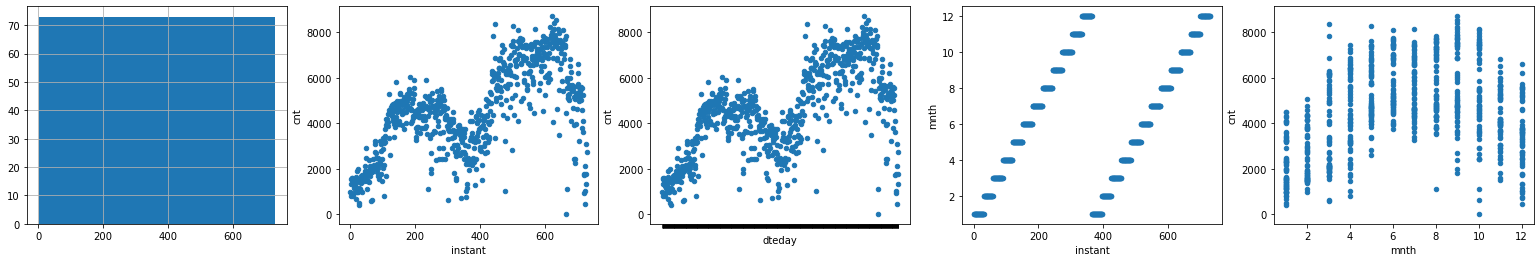

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(27, 4))

# Lets see the histogram of the column.
df.instant.hist(ax=axes[0])

# Now lets see its relationship with the target variable.
df.plot.scatter(x='instant', y='cnt', ax=axes[1])

# Lets see how the date interacts with the target variable.
df.plot.scatter(x='dteday', y='cnt',ax=axes[2]).set_xticklabels([])

# Lets see how its relationsip with month
df.plot.scatter(x='instant', y='mnth',ax=axes[3])

# Lets see how month's relationship with the target variable
df.plot.scatter(x='mnth', y='cnt',ax=axes[4])

plt.show()

From the above chart, we can conclude that:

- It reveals uniform distribution.
- It has non-linear relationship with the target column.
- Month has exactly the same non-linear relationship with the target column as the identifier column.
- It has linear relationship with month.
- Month has non-linear relationship with the target column.

It is clear that `instant` can be considered as irrelevant column and other columns can be used as a proxy to this value.

#### Date Column

Previously we can see that scatter plot of `dteday` and `instant` are identical, this is because both of them have distinct values, and therefore behave the same and appears to be identical, lets take a look again at their scatter plot.

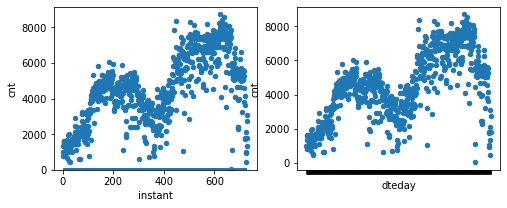

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Lets see the histogram of the column.
df.instant.hist(ax=axes[0])

# Now lets see its relationship with the target variable.
df.plot.scatter(x='instant', y='cnt', ax=axes[0])

# Lets see how the date interacts with the target variable.
df.plot.scatter(x='dteday', y='cnt',ax=axes[1]).set_xticklabels([])

plt.show()

To confirm that they have distinct values, lets count their values.

In [13]:
df.dteday.value_counts()

28-11-2018    1
17-01-2019    1
11-07-2018    1
09-06-2018    1
20-09-2018    1
             ..
03-08-2018    1
26-09-2018    1
14-10-2019    1
06-10-2018    1
05-03-2018    1
Name: dteday, Length: 730, dtype: int64

As we can see the length of the value counts are 730, this is the same with the total number of rows, that means `dteday` behave like identifier column. But, this column contains significant information, luckily we already have some of them extracted, such as: `yr`, `mnth`, and `weekday`, even some information beyond that have been extracted, such as: `holiday` and `workingday`, but we still have one information missing, that is day of the month, later on we will create information to be derived from this column before cleaning it up.

#### Subsets of Target Column

There are columns that are of no use to our model creation because they are in fact subsets of the target column, they are `casual` and `registered`, the total of both columns make up our target column that is `cnt`.

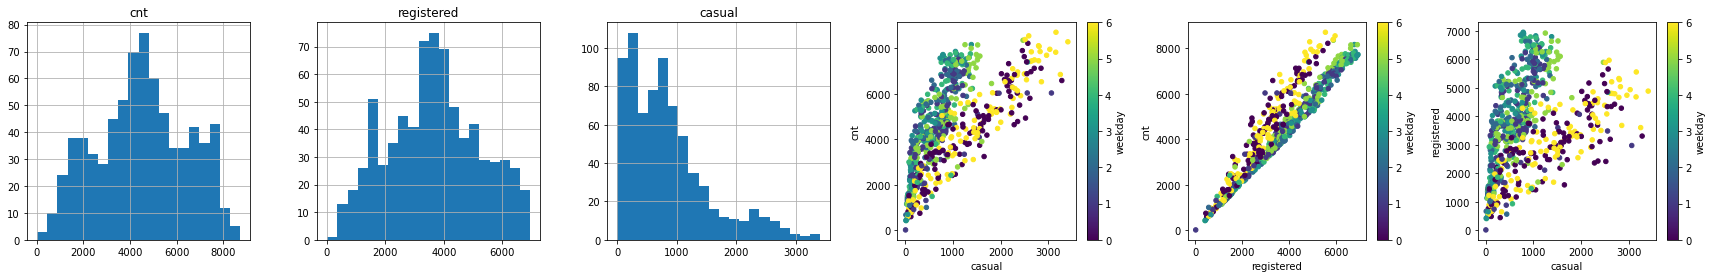

In [14]:
fig, axes = plt.subplots(1, 6, figsize=(30,4))

df[['cnt']].hist(ax=axes[0], bins=20)
df[['registered']].hist(ax=axes[1], bins=20)
df[['casual']].hist(ax=axes[2], bins=20)

df.plot.scatter(x='casual', y='cnt', c='weekday', colormap='viridis', ax=axes[3])
df.plot.scatter(x='registered', y='cnt', c='weekday', colormap='viridis', ax=axes[4])
df.plot.scatter(x='casual', y='registered', c='weekday', colormap='viridis', ax=axes[5])

plt.show()

From the above chart we can see that:

- Distribition of `registered` resembles closely with `cnt`.
- Distribution of `casual` skewed to the right, it may provide some kind of useful insights.
- Both `casual` and `registered` shows positive linear correlation with `cnt`.
- There are other variables affecting the linearity, one of them is `weekday`.
- There is positive linear correlation between `casual` and `registered`, but other variable maybe in effect.

The actual values of `registered` and `casual` may be of no use to our model, but they still provide usefull insights, we will deal with this issue in the later sections of the notebook.

### 1.1.5. Shape of Distribution

#### Data Distributions

To have a visual perspective of the distribution of our dataset, lets plot histogram chart over them all.

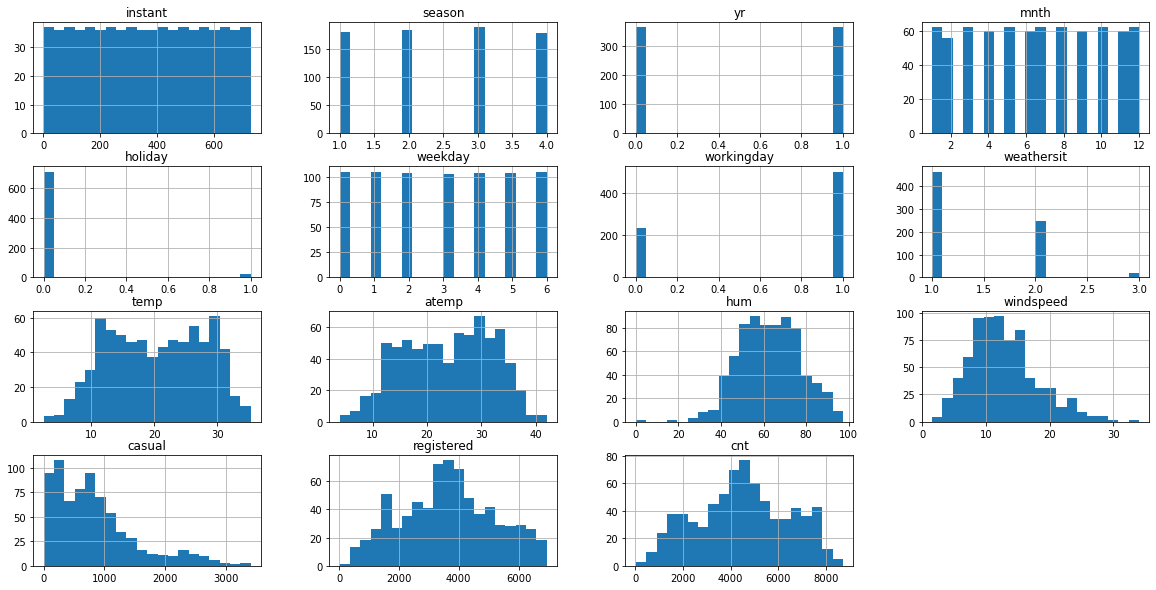

In [15]:
df.hist(figsize=(20,10), bins=20); plt.show()

Visually, we can see some observations as follows:

- Some columns reveal uniform distributions, e.g. instant, season, yr, mnth, & weekday.
- Some columns have identical distributions, e.g. temp & atemp, registered & cnt.
- Some columns have skews, e.g. holiday, workingday, weathersit, hum, windspeed & casual.

Out of all the columns, visually there are no immediate concerns that we need to handle, all of the distributions are in a good shape.

#### Data Outliers

Lets see if our data have some sort of outliers by ploting a boxplot only on non-categorical and non-uniform columns, as to the categorical columns and uniformly distributed columns would definitely has no outliers. But we would split them in two plots, that is because we have columns with very different range.

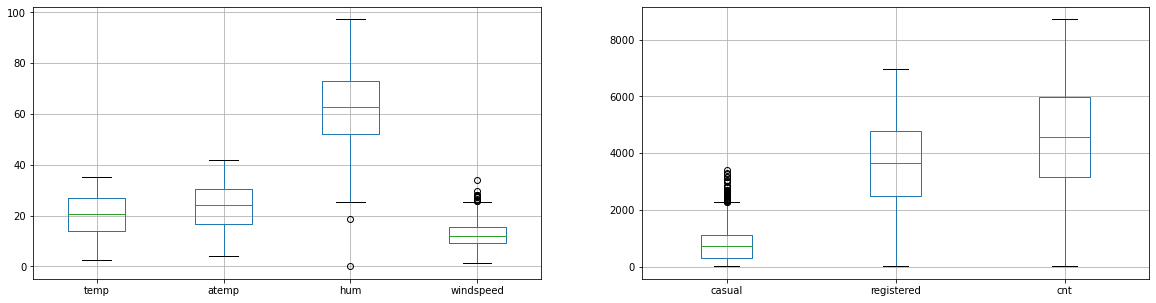

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

df[['temp', 'atemp', 'hum', 'windspeed']].boxplot(ax=axes[0])
df[['casual', 'registered', 'cnt']].boxplot(ax=axes[1])

plt.show()

On the left is boxplot of temp, atemp, hum and windspeed with range of 40-100, and on the right is casual, registered and cnt with range of 4000-9000, we can see clearly in both plots there are no significant outliers, all of the data are still within a considerably close proximity with the interquartile range, therefore nothing needs to be done with regards of the outlier.

#### Data Skewness

In order to measure the distribution in a quantifiable manner, we need to look at the data skewness, its a measurement of how symmetrical is the distribution. A general guideline would be for values greater than +1, or lower than -1, it means that it there is a substantial skewness in the distribution.

In [17]:
df.skew()

instant       0.000000
season       -0.002571
yr            0.000000
mnth         -0.010478
holiday       5.650014
weekday       0.002745
workingday   -0.790992
weathersit    0.961855
temp         -0.057187
atemp        -0.133709
hum          -0.067476
windspeed     0.676314
casual        1.266328
registered    0.041211
cnt          -0.049581
dtype: float64

Most of our data are still within an acceptable range of skewness, except for holiday, since its basically a binary categorical variable, we can ignore them as to there is no action item needed to be taken on the given column.

#### Data Kurtosis

To have a quantifiable justification of our data, we also need to measure the kurtosis, its a measurment of the peak of the distribution, are they too narrow or too wide. A general guideline would be values of greater than +1 or lower than -1 would have a significant kurtosis and have substantially narrow range of data distribution.

In [18]:
df.kurt()

instant       -1.200000
season        -1.341120
yr            -2.005502
mnth          -1.207096
holiday       30.004851
weekday       -1.256688
workingday    -1.378114
weathersit    -0.126895
temp          -1.118305
atemp         -0.984513
hum           -0.059830
windspeed      0.405909
casual         1.321342
registered    -0.710250
cnt           -0.808080
dtype: float64

Once again all of our data are in a good shape, except for holiday, as for categorical values it is considerably safe because each of the values in a categorical data is useful, and therefore no action item needed to be taken.

## 1.2. Categorical Variables

### 1.2.1. Fix Season Data

We have previously identified that despite it has numerical values, but there is no specific order or ranking of the data, from the data description we can see the data classification as follows:

1. spring
2. summer
3. fall
4. winter

In stevens typology, this column is identified as nominal column, that is no mathematical calculation, nor range, nor ranks within the data, and therefore we should treat them as such. The easiest way to do that is by changing the data type to string, but we want to stretch further by undoing the categorization and simply put the season name, so that in the later section in the notebook, we can create dummy variables on top of them.

Lets change the values accordingly with their appropriate name.

In [19]:
seasons = ['spring', 'summer', 'fall', 'winter']

df.season = df.season.apply(lambda d: seasons[d - 1])

### 1.2.2. Fix Weather Data

We have also previously identified that this column values is in no particular order, following are the data description:

1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

It is clear that by the definition in Stevens Typology, this column can be identified as nominal column, as they are unrankable. Just like what we did with season, we would like to undo the simplification, and apply the name of the weather, but rather a more simplified name instead of the more verbose form.

Lets change their values with a simplified weather name.

In [20]:
weathers = ['clear', 'cloudy', 'rainy', 'snowy']

df.weathersit = df.weathersit.apply(lambda d: weathers[d - 1])

## 1.3. Dummy Variables

We would need to transform our categorical columns, that is the nominal column we have fixed in the previous section, into one hot encoding, or we can say them as dummy variables. This transformation enables us to generate a model that takes into account our categorical columns, therefore we can have a more robust and good interpretability of our model.

A general formula of total dummy variables is: `k-1`, therefore given our dataset, we would only need to create one minus total values of our categorical values, that means we would need to drop the first, or we can say the base value of our dummy variable. This is done in order to have a lesser multicollinearity, that is the high correlation between independent variables.

### 1.3.1. Season Dummy Variables

Lets create dummy variables for season, and drop the first column.

In [21]:
seasons = pd.get_dummies(df['season'], drop_first=True)
seasons.head(3)

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0


Lets add them to our dataset.

In [22]:
df = pd.concat([df, seasons], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,spring,0,1,0,6,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,spring,0,1,0,0,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


### 1.3.2. Weather Dummy Variables

Lets create dummy variables for season, and drop the first column.

In [23]:
weathers = pd.get_dummies(df['weathersit'], drop_first=True)
weathers.head()

,cloudy,rainy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


Lets add them to our dataset.

In [24]:
df = pd.concat([df, weathers], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,spring,summer,winter,cloudy,rainy
0,1,01-01-2018,spring,0,1,0,6,0,cloudy,14.110847,...,80.5833,10.749882,331,654,985,1,0,0,1,0
1,2,02-01-2018,spring,0,1,0,0,0,cloudy,14.902598,...,69.6087,16.652113,131,670,801,1,0,0,1,0
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,...,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,...,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,...,43.6957,12.522300,82,1518,1600,1,0,0,0,0


## 1.4. Derived Metrics

### 1.4.1. Ratios

There are informations that we can derive and may enrich our model, we have two information that is part of the target variable and is of no use on its own within our model, which are: casual and registered, because the total of both variables are the target variable.

But these may add value to identify if user are more to a casual or registered kind of customer and if they are part of the contributing variables. Therefore we need to transform these variables into another form, that is ratios. With this, it can add value to our model.

#### Casual Rate

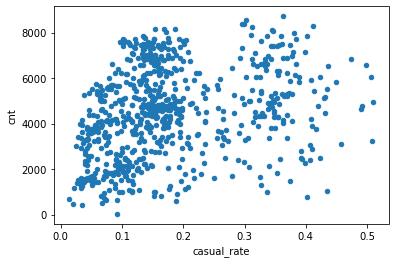

In [25]:
df['casual_rate'] = df.casual / df.cnt
df.plot.scatter(x='casual_rate', y='cnt'); plt.show()

#### Registered Rate

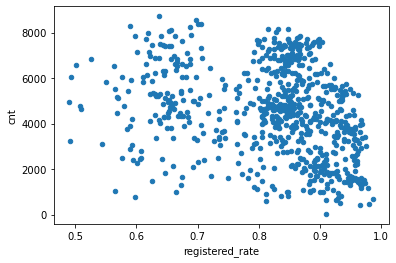

In [26]:
df['registered_rate'] = df.registered / df.cnt
df.plot.scatter(x='registered_rate', y='cnt'); plt.show()

### 1.4.2. Weathers

There are informations we can derive from our dataset that is related to weather, here we'll use the library `metpy` that is specifically designed to calculate weather data. We will calculate some of the information related  weather data to our dataset by using the columns `temp`, `hum` and `windspeed`, and the derived metrics that we will calculate are `apparent_temperature`, `heat_index` and `windchill`.

#### Apparent Temperature

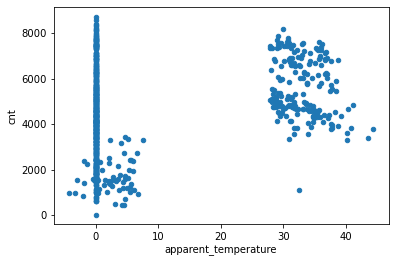

In [27]:
df['apparent_temperature'] = df.apply(lambda row: mpcalc.apparent_temperature(row.temp * units.degC, row.hum * units.percent, row.windspeed * units('m/s')), axis=1)
df['apparent_temperature'] = df.apparent_temperature.apply(lambda x: x[0].to('degC').magnitude)

df.plot.scatter(x='apparent_temperature', y='cnt'); plt.show()

#### Heat Index

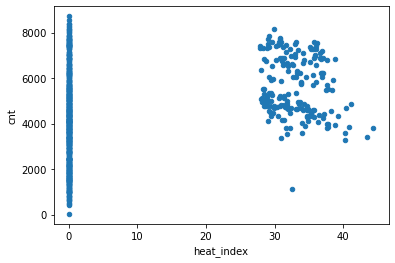

In [28]:
df['heat_index'] = df.apply(lambda row: mpcalc.heat_index(row.temp * units.degC, row.hum * units.percent), axis=1)
df['heat_index'] = df.heat_index.apply(lambda x: x[0].to('degC').magnitude)

df.plot.scatter(x='heat_index', y='cnt'); plt.show()

#### Windchill

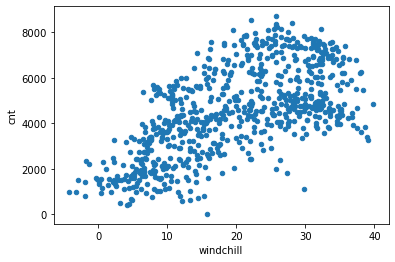

In [29]:
df['windchill'] = df.apply(lambda row: mpcalc.windchill(row.temp * units.degC, row.windspeed * units('m/s')), axis=1)
df['windchill'] = df.windchill.apply(lambda row: row.to('degC').magnitude)

df.plot.scatter(x='windchill', y='cnt'); plt.show()

### 1.4.3. Dates

Some of the date related information have been derived and available to us, such as: `yr`, `mnth`, `holiday`, `weekday`, and `workingday`. But we still have one missing information to be derived, that is the day of the month, so that we can have a more holistic derived data.

#### Fix Date Type

Previously we have discovered that the column `dteday` values are dates, but was not properly inferred by pandas as date type, lets see if we can transform them into the proper data type of date with the correct date time format.

In [30]:
df.dteday.apply(lambda d: pd.to_datetime(d, format='%d-%m-%Y')).head()

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: dteday, dtype: datetime64[ns]

It looks like everything works just fine, pandas just couldn't figure out the format of the date data type, therefore we can apply the data type transformation back into our dataframe so that it can be utilized properly.

In [31]:
df.dteday = df.dteday.apply(lambda d: pd.to_datetime(d, format='%d-%m-%Y'))

#### Day of the Month

Now lets extract the day of the month from our date time column, and lets plot them visually.

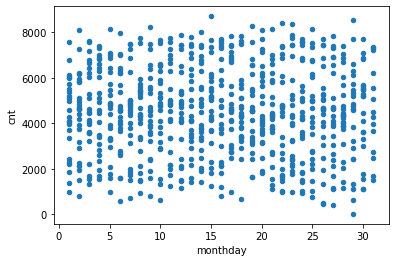

In [32]:
df['monthday'] = df.dteday.dt.strftime('%d').astype('int')
df.plot.scatter(x='monthday', y='cnt'); plt.show()

## 1.5. Data Cleaning

### 1.5.1. Remove Columns

#### Remove Identifier Column

We have previously identified that identifier column is part of columns that are irrelevant, this is because this column are infact identifier column of each data, and it is of no use as part of a model, therefore we can remove this column to have a more meaningful model.

In [33]:
df.drop(columns=['instant'], inplace=True)

#### Remove Date Column

We have previously identified that the `dteday` column have distinct values and appears to be identical with the identifier column. It contains useful information, and we already have their derived values, therefore this column is of no longer use to use.

In [34]:
df.drop(columns=['dteday'], inplace=True)

#### Remove Subsets of Target Column

Now lets remove columns that are the subset of our target column, which are casual and registered, this is because the total of both these columns make up our target column, we already have their derived column therefore removing this column is safe.

In [35]:
df.drop(columns=['casual', 'registered'], inplace=True)

#### Remove Categorical Column

Our categorical columns have previously been transformed into dummy variables, therefore we no longer need the origincal categorical column, lets remove the column `weathersit` and `season` to exclude them from our model.

In [36]:
df.drop(columns=['season', 'weathersit'], inplace=True)

# 2. Model Building and Evaluation


## 2.1. Parameter Tuning

Lets split our data into train and test data, we may need to set the train test ratio to 70:30 because the amount of our dataset is fairly small, and set the random state to 0 so that the result is the same everytime we run the following statement.

In [37]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=0)

y_train = df_train[['cnt']]
X_train = df_train.drop(columns=['cnt'])

y_test = df_test[['cnt']]
X_test = df_test.drop(columns=['cnt'])

### 2.1.1. Simple Linear Regression

#### Most Correlated Column

In its simplest term, linear regression is an ordinary least squares, and we can try to build a linear model from one column with the highest correlation, lets see which column has the highest correlation with our target variable.

In [38]:
df_train.corr()[['cnt']].sort_values(by='cnt', ascending=False).head(3)

,cnt
cnt,1.000000
atemp,0.642696
windchill,0.640715


As we see, the most correlated column is `atemp`, therefore we will build a simple linear model from this column. 

#### Simple Linear Model

Now lets build a simple linear model from the column `atemp`, and lets calculate its R-square both on the train and test data.

In [39]:
y_train_simple = df_train[['cnt']]
X_train_simple = df_train[['atemp']]

model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)

y_test_simple = df_test[['cnt']]
X_test_simple = df_test[['atemp']]

print('R-square of train data: ', model_simple.score(X_train_simple, y_train_simple))
print('R-square of tests data: ', model_simple.score(X_test_simple, y_test_simple))

R-square of train data:  0.4130577910107205
R-square of tests data:  0.37049558939521443


#### Conclusion

This model is **underfit**, with R-square of 0.41 on the train dataset, it clearly has lots of room to improve, therefore we will not use this model and build another model with multiple variables using multiple linear regression.

### 2.1.2. Multiple Linear Regression

Now lets build multiple linear regression model using all columns, but we will evaluate linear model with and without scaling, and validate if it is true there won't be any difference on the R-square score.

#### Without Scaling

The difference between this and previous model is the column being used, while previously we're using only one column, now we're using all columns, lets build the model and calculate the R-square on the train and test data.

In [40]:
y_train_multiple = df_train[['cnt']]
X_train_multiple = df_train.drop(columns=['cnt'])

model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple, y_train_multiple)

y_test_multiple = df_test[['cnt']]
X_test_multiple = df_test.drop(columns=['cnt'])

print('R-square of train data: ', model_multiple.score(X_train_multiple, y_train_multiple))
print('R-square of tests data: ', model_multiple.score(X_test_multiple, y_test_multiple))

R-square of train data:  0.8494681686160885
R-square of tests data:  0.8663132451858079


#### With Scaling

Now lets build the model again, but with the columns scaled to just between 0 and 1, this is to allow interpretability on the variables, and lets verify if both model with and without scaling have the same R-square, lets create a helper function so that we can use it later on.

In [41]:
def build_model_with_scaling():
    scaler = MinMaxScaler()

    y_train = df_train[['cnt']]
    X_train = df_train.drop(columns=['cnt'])
    X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_test = df_test[['cnt']]
    X_test = df_test.drop(columns=['cnt'])
    X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

    print('R-square of train data: ', model.score(X_train, y_train))
    print('R-square of tests data: ', model.score(X_test, y_test))

build_model_with_scaling()

R-square of train data:  0.8494681686160885
R-square of tests data:  0.866313245185808


#### Conclusion

Both model show the same R-square result, this validates that scaling the model doesn't affect the model, and with the scaling, we get interpretability, and with the above result, it is slightly underfit because we're seeing the R-square of test data is a little bit above the R-square of train data, at the very least, it provides a benchmark for the next models.

## 2.2. Variable Selection

### 2.2.1. Multiple Linear Regression with VIF

#### VIF Measurement

With previous model as a baseline, lets do feature selection by calculating the variance inflation factor, we will eliminate the columns one by one with vif more than 5 until all columns' vif is less than 5, lets create a helper function to calculate the VIF.

In [42]:
def vif(df):
    df_vif = pd.DataFrame()
    df_vif['Features'] = df.columns
    df_vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'], 2)
    df_vif = df_vif.sort_values(by = "VIF", ascending = False)
    
    return df_vif

#### Model Builder

And lets create a helper function to create a model with feature selection by dropping columns with VIF more than 5, inside the function we will print the R-square of both train and test data, and we will also print the columns with highest VIF.

In [43]:
def build_model_with_vif(drop=[]):
    scaler = MinMaxScaler()

    y_train = df_train[['cnt']]
    X_train = df_train.drop(columns=['cnt'] + drop)
    X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_test = df_test[['cnt']]
    X_test = df_test.drop(columns=['cnt'] + drop)
    X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

    print('R-square of train data: ', model.score(X_train, y_train))
    print('R-square of tests data: ', model.score(X_test, y_test))    
    
    print()
    print(vif(X_train).head(3))

#### Parameter Tuning

Now lets evaluate the model with its VIF, then lets remove column with highest VIF one by one, and re-evaluate them.

In [44]:
build_model_with_vif()

R-square of train data:  0.8494681686160885
R-square of tests data:  0.866313245185808

     Features      VIF
18  windchill  1349.17
5        temp  1060.09
6       atemp   265.19


The R-square is the same as the previous model, and we can see `windchill` has the highest VIF, lets drop it, rebuild the model and recalculate its VIF.

In [45]:
build_model_with_vif(drop=['windchill'])

R-square of train data:  0.8492001212257738
R-square of tests data:  0.8664220530834517

                Features     VIF
17            heat_index  244.79
16  apparent_temperature  230.36
5                   temp  221.86


The R-square is relatively the same, now lets drop the `heat_index` and re-evaluate the model.

In [46]:
build_model_with_vif(drop=['windchill', 'heat_index'])

R-square of train data:  0.8491788877651032
R-square of tests data:  0.8660355563537286

           Features     VIF
5              temp  215.79
6             atemp  205.77
15  registered_rate   50.45


The R-square is still relatively the same, now lets drop the `temp` and re-evaluate the model.

In [47]:
build_model_with_vif(drop=['windchill', 'heat_index', 'temp'])

R-square of train data:  0.8464171952355763
R-square of tests data:  0.8544770540942004

           Features    VIF
14  registered_rate  49.95
13      casual_rate  15.26
8            spring   5.82


The R-square is getting closer between train and test data, but is still not close enough, this indicates a better model than before, lets drop again the next column with the highest VIF, that is `registered_rate`, and re-evaluate the model.

In [48]:
build_model_with_vif(drop=['windchill', 'heat_index', 'temp', 'registered_rate'])

R-square of train data:  0.8464171952355763
R-square of tests data:  0.8544770540942002

  Features    VIF
5    atemp  29.49
6      hum  14.90
1     mnth  12.33


The R-square is still relatively the same as previous model, lets drop the `atemp` and re-evaluate the model.

In [49]:
build_model_with_vif(drop=['windchill', 'heat_index', 'temp', 'registered_rate', 'atemp'])

R-square of train data:  0.7766430495226242
R-square of tests data:  0.8376352005248093

       Features    VIF
5           hum  13.02
1          mnth  12.22
12  casual_rate   7.13


The R-square is getting worse, with the train data its underfit, this indicates we should stop removing the columns, because it won't make the model any better from here, lets continue to validate that removing the columns won't improve the model any further, lets drop the `hum` and re-evaluate the model.

In [50]:
build_model_with_vif(drop=['windchill', 'heat_index', 'temp', 'registered_rate', 'atemp', 'hum'])

R-square of train data:  0.7766341950692188
R-square of tests data:  0.8376796645613606

       Features    VIF
1          mnth  11.47
11  casual_rate   6.37
4    workingday   5.90


The R-square is relatively the same and is still underfit, lets remove again the column `mnth` and re-evaluate the model.

In [51]:
build_model_with_vif(drop=['windchill', 'heat_index', 'temp', 'registered_rate', 'atemp', 'hum', 'mnth'])

R-square of train data:  0.7765992868267904
R-square of tests data:  0.8366788412495021

       Features   VIF
10  casual_rate  4.95
3    workingday  4.83
4     windspeed  4.51


The R-square is relatively the same, is still underfit, and no more columns with VIF more than 5.

#### Conclusion

The best model with columns removed using VIF is as follows.

In [52]:
build_model_with_vif(drop=['windchill', 'heat_index', 'temp', 'registered_rate'])

R-square of train data:  0.8464171952355763
R-square of tests data:  0.8544770540942002

  Features    VIF
5    atemp  29.49
6      hum  14.90
1     mnth  12.33


Despite some columns are still having a pretty high VIF, the model provides a pretty good R-square, where the distance between train and test data is close enough, showing a little bit of underfit, but its the best model we can get from feature selection using VIF. Removing the rest of the columns with the highest VIF value makes the model worst by lowering the R-square of training data and increase the gap of underfit.

### 2.2.2. Multiple Linear Regression with RFE

#### Model Builder

One way of doing automatic feature selection is using recursive feature elimination, lets build a helper function to build the model, initialize RFE with the model and print the R-square of train and tests data.

In [53]:
def build_model_with_rfe(features):
    scaler = MinMaxScaler()

    y_train = df_train[['cnt']]
    X_train = df_train.drop(columns=['cnt'])
    X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

    model = RFE(LinearRegression(), n_features_to_select=features)
    model.fit(X_train, y_train)

    y_test = df_test[['cnt']]
    X_test = df_test.drop(columns=['cnt'])
    X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

    print('R-square of train data: ', model.score(X_train, y_train))
    print('R-square of tests data: ', model.score(X_test, y_test))
    
    return model, scaler

#### Parameter Tuning

Lets revisit the baseline of our model by not removing any columns.

In [54]:
build_model_with_rfe(features=len(df.columns));

R-square of train data:  0.8494681686160885
R-square of tests data:  0.866313245185808


Now lets reduce the features to 15 and re-evaluate the model.

In [55]:
build_model_with_rfe(features=15);

R-square of train data:  0.8451394512954062
R-square of tests data:  0.8559800484892088


With 15 features, the distance between R-square of train and test data is now closer, lets reduce the feature further and re-evaluate the model.

In [56]:
build_model_with_rfe(features=8);

R-square of train data:  0.8280902135277346
R-square of tests data:  0.8290124327724514


With 8 features, it is now reaching the closest gap between train and test data, if we were to reduce them any further, it would probably be getting worse, lets validate them by reducing the features further.

In [57]:
build_model_with_rfe(features=6);

R-square of train data:  0.7961114758087624
R-square of tests data:  0.772106589570906


By reducing the feature further, the R-square is getting worse both on the train and test data.

#### Conclusion

The best model with a good R-square and close gap between train and test data is with 8 features.

In [58]:
build_model_with_rfe(features=8);

R-square of train data:  0.8280902135277346
R-square of tests data:  0.8290124327724514


## 2.3. Model Selection

### 2.3.1. Potential Models

Before selecting any model, lets re-evaluate all models that we have created, and with potentially good R-square values.

#### Linear Model with Scaling

In [59]:
build_model_with_scaling()

R-square of train data:  0.8494681686160885
R-square of tests data:  0.866313245185808


#### Feature Selection with VIF

In [60]:
build_model_with_vif(drop=['windchill', 'heat_index', 'temp', 'registered_rate'])

R-square of train data:  0.8464171952355763
R-square of tests data:  0.8544770540942002

  Features    VIF
5    atemp  29.49
6      hum  14.90
1     mnth  12.33


#### Feature Selection using RFE

In [61]:
build_model_with_rfe(features=8);

R-square of train data:  0.8280902135277346
R-square of tests data:  0.8290124327724514


### 2.3.2. Best Possible Model

All of the above model provide a good R-square value on the training data, but the best model should provide a R-square value on the test data as close as possible to the R-square of training data, therefore we can limit our choice to the feature selection using RFE. Feature selection using RFE provides a simpler model as it only uses 8 features compared to 16 features being used by feature selection using VIF, it also provides a model with smalest gap between R-square of train and test data.

In [62]:
model, scaler = build_model_with_rfe(features=8)

R-square of train data:  0.8280902135277346
R-square of tests data:  0.8290124327724514


## 2.4. Model Evaluation

### 2.4.1. Residual Analysis

Now lets plot the error terms and validate our assumption that the errors are normally distributed.

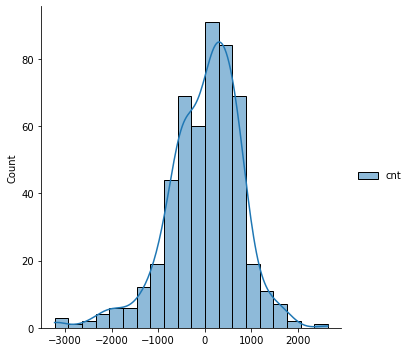

In [63]:
y_train_pred = model.predict(scaler.transform(X_train))
sns.displot((y_train[['cnt']] - y_train_pred), bins = 20, kde=True)

plt.show()

Our assumption have been validated, the error terms are normally distributed.

### 2.4.2. Model Prediction

Now lets evaluate our model by running the prediction against our test data, and plot them accordingly.

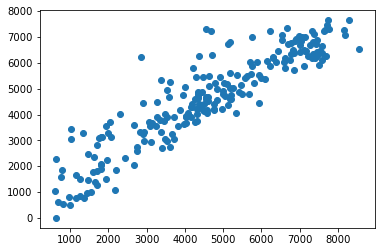

In [64]:
y_pred = model.predict(scaler.transform(X_test))

plt.scatter(y_test,y_pred)
plt.show()

As we can see, they resemble linear model and we can say that the model is good, lets re-evaluate our R-square values.

In [65]:
print('R-square of train data: ', model.score(scaler.transform(X_train), y_train))
print('R-square of tests data: ', model.score(scaler.transform(X_test), y_test))

R-square of train data:  0.8280902135277346
R-square of tests data:  0.8290124327724514


We also have a good R-square values of 0.82 on both training and testing data set, with only ~0.0009 difference.

### 2.4.3. Model Interpretation

#### Intercept

Lets output the intercept of our model.

In [66]:
model.estimator_.intercept_[0]

2934.8961936271817

#### Coeficients

Lets output the coeficients of our model.

In [67]:
dict(zip(X_train.columns[model.support_], model.estimator_.coef_[0]))

{'yr': 1902.4137854971468,
 'temp': 6125.121529066783,
 'hum': -1663.7146901903857,
 'windspeed': -1469.6705714825362,
 'spring': -1050.6253260417755,
 'rainy': -1337.132022150946,
 'apparent_temperature': -1887.166531996481,
 'windchill': -698.8550618924029}

From the above coeficients, we can see there are several interesting findings:
1. `temp` is the most contributing variable, followed with `yr` and `apparent_temperature`.
2. Only `spring` from season dummy variables selected as a feature.
3. Only `rainy` from weather dummy variables selected as a feature.
4. Only `apparent_temperature` and `windchill` from our derived metrics selected as a feature.

#### Mathematical Model

From the above intercept and coeficients, we can build the linear regression mathematical model as follows.

$ cnt = 2934.8961936271817 + 1902.4137854971468 \times yr + 6125.121529066783 \times temp - 1663.7146901903857 \times hum - 1469.6705714825362 \times windspeed - 1050.6253260417755 \times spring - 1337.132022150946 \times rainy - 1887.166531996481 \times apparent\_temperator - 698.8550618924029 \times windchill $